In [2]:
# %load init_setup/setup.py
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets

np.set_printoptions(formatter={'float': '{: 0.5f}'.format}, suppress = True)
matplotlib.rcParams.update({'font.size': 16})


In [3]:
# %load init_setup/setup2.py
matplotlib.rcParams.update({'font.size': 16})


In [4]:
# %load init_setup/parameters.py
# ==- PLOT PARAMETERS -=============================================================================
loglogalpha = 0.70
baralpha    = 0.85

plot_size = (14,8)
subplot_size = (7,4)


In [5]:
# %load init_setup/palette.py
# ==- COLORS -======================================================================================
#            normal     dark       light
c_red     = ["#e6194b", "#800000", "#fabebe"]
c_orange  = ["#f58231", "#9a6324", "#ffd8b1"]
c_yellow  = ["#ffe119", "#808000", "#fffac8"]
c_lime    = ["#bfef45"]
c_green   = ["#3cb44b",            "#aaffc3"]
c_cyan    = ["#42d4f4", "#469990"]
c_blue    = ["#4363d8", "#000075"]
c_purple  = ["#911eb4",            "#e6beff"]
c_magenta = ["#f032e6"]
c_gray    = ["#a9a9a9", "#000000", "#ffffff"]
accessibility_95    = [c_red[0],     c_green[0],   c_blue[0],    c_yellow[0],  c_orange[0],
                       c_purple[0],  c_cyan[0],    c_magenta[0], c_lime[0],    c_red[2],
                       c_cyan[1],    c_purple[1],  c_orange[1],  c_yellow[2],  c_red[1],
                       c_green[1],   c_yellow[1],  c_orange[2],  c_blue[1],    c_gray[0],
                       c_gray[1]]
accessibility_99    = [c_red[0],     c_green[0],   c_blue[0],    c_yellow[0],  c_orange[0],
                       c_cyan[0],    c_magenta[0], c_red[2],     c_cyan[1],    c_purple[1],
                       c_orange[1],  c_yellow[2],  c_red[1],     c_green[1],   c_blue[1],
                       c_gray[0],    c_gray[1]]
accessibility_99_99 = [c_blue[0],    c_yellow[0],  c_orange[0],  c_red[2],     c_purple[1],
                       c_red[1],     c_blue[1],    c_gray[0],    c_gray[1]]
accessibility_100   = [c_blue[0],    c_yellow[0],  c_gray[0],    c_gray[1]]


In [6]:
# Read a file containing one array
def read_file(filename):
    arr = []
    f = open(filename, "r")

    for line in f:
        arr.append(float(line.replace("\n", "")))

    f.close()
    return np.array(arr)

# Read a file containing three arrays
def read_chi2_file(filename):
    C_prev = []
    alpha  = []
    C_next = []

    f = open(filename, 'r')
    for line in f:
        s_arr = line.replace("\n", "").split(" ")
        f_arr = []
        for i in range(len(s_arr)):
            if   s_arr[i] == "nan":  f_arr.append(math.nan)
            elif s_arr[i] == "inf":  f_arr.append(math.inf)
            elif s_arr[i] == "-inf": f_arr.append(-math.inf)
            else:                    f_arr.append(float(s_arr[i]))
        C_prev.append(f_arr[0])
        alpha.append(f_arr[1])
        C_next.append(f_arr[2])

    f.close()
    return (np.array(C_prev), np.array(alpha), np.array(C_next))

# Scatter plots arrays of equal size
def scatter_plot(yscale, arrs, names):
    fig, ax = plt.subplots()
    
    fig.set_size_inches(plot_size)
    index = np.arange(len(arrs[0]))

    for i in range(len(arrs)):
        plt.scatter(index, arrs[i], c=accessibility_99[i], label=names[i])
        plt.plot(   index, arrs[i], c=accessibility_99[i], alpha=baralpha)

    plt.yscale(yscale)
    plt.ylabel("Value")
    plt.legend()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color=c_gray[1], linestyle='-', linewidth=0.25, alpha=0.5)

    plt.tight_layout()
    plt.show()
    return

In [8]:
# SETUP
MASTERDIR  = "data/alpha_tests/"
DETCALCDIR = "detcalc_time/"
CONDDIR    = "condnumber/"
CHI2DIR    = "chi2_per_iteration/"
AVRDETSDIR = "alpha_vs_regular_dets/"

# Determinant Values

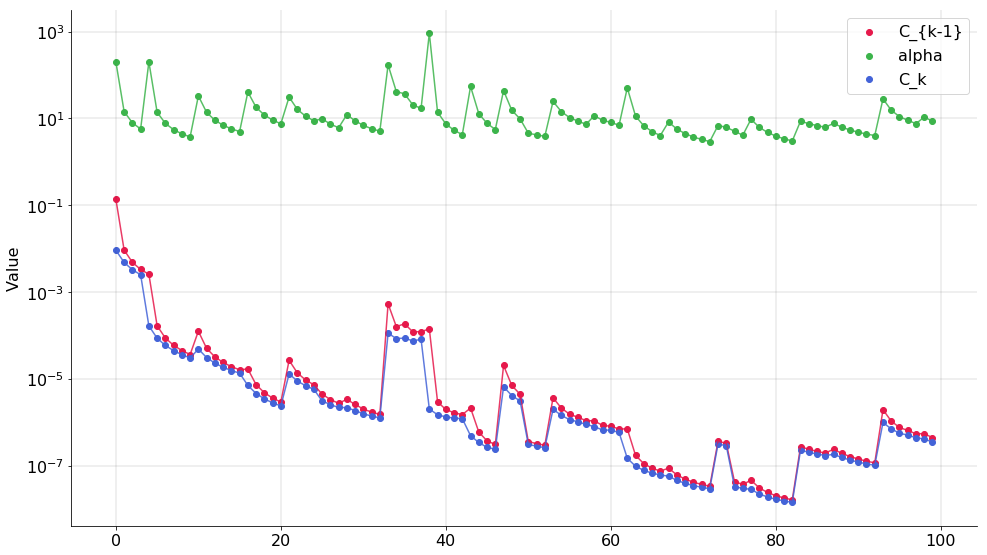

In [9]:
# 0|0
det1_00  = [0.0, 0.0, -0.0, -0.0, 0.0]
alpha_00 = [3.0818297623205675e+118, 1.4781678161397155e+114, 3.8509416079438577e+155, 3.9480697451896846e+50, 6.478519641865663e+198]
det2_00  = [1.4475592746727317e+240, 0.0, math.inf, 1.1293229080805717e+92, math.nan]

# 0|1

# 1|0
det1_10  = [1.8639847418651723e+303, -4.0192433902838985e+195, -1.3358852945293088e+282, math.inf, math.inf, -math.inf, -1.236708186011162e+183, -math.inf, math.inf, -1.065309856146748e+255]                                                                                                                  
alpha_10 = [1.0252868110533773e+138, 1.2035270126518866e+79, 4.0400555623554006e+113, 4.5485560471951957e+148, 4.5485560471951957e+148, 1.8925369981886526e+145, 1.3561657631657497e+92, 1.7246127714976315e+133, 8.722285261761037e+134, 8.293698850445792e+73]                       
det2_10  = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# 1|1
det1_11  = [0.13702064447681378, 0.00924351276265371, 0.004820549293263976, 0.003300744660657435, 0.002564674979121421, 0.00016636691219292166, 8.66367415055471e-05, 5.886269536439435e-05, 4.472998809543984e-05, 3.6162604795156295e-05, 0.00012447764900686852, 5.0093366174693204e-05, 3.191562683126734e-05, 2.3716395594554372e-05, 1.9054935694020232e-05, 1.6050725372441407e-05, 1.6780901797813486e-05, 7.296056674042154e-06, 4.756834367028374e-06, 3.581211310395645e-06, 2.90469349288066e-06, 2.6594066249984173e-05, 1.3616462299515983e-05, 9.366931627108666e-06, 7.260535515130362e-06, 4.416351491463628e-06, 3.3163918467015224e-06, 2.7126781195192005e-06, 3.3510527099906887e-06, 2.549225074128799e-06, 2.0067736963435022e-06, 1.6981161604545122e-06, 1.503162499532904e-06, 0.000531880975904341, 0.00015912853601375736, 0.00018460954058448762, 0.0001202377687826572, 0.00012152848393212504, 0.0001410519368778557, 2.925956179853921e-06, 1.9576037100822056e-06, 1.6418810276090698e-06, 1.4908514902642506e-06, 2.111382100863947e-06, 5.891367169821097e-07, 3.695038963816792e-07, 3.055038597526631e-07, 2.019027933916199e-05, 6.984213443068977e-06, 4.398578884912309e-06, 3.560628217321695e-07, 3.1974662926415547e-07, 2.9186843128359357e-07, 3.649827401882913e-06, 2.109178168144516e-06, 1.522888830614406e-06, 1.294449693026158e-06, 1.0847006401555097e-06, 1.0679682948390538e-06, 8.401589076547167e-07, 8.049303394775736e-07, 6.948918801312053e-07, 6.982028057920575e-07, 1.717545642361681e-07, 1.1046566678729082e-07, 8.683950737850828e-08, 7.437833457628738e-08, 8.682680570925451e-08, 6.105142849641317e-08, 4.8656581616874414e-08, 4.1388431337683497e-08, 3.662367363496317e-08, 3.326782541855997e-08, 3.6018648516808263e-07, 3.2567213023912775e-07, 4.221377772999386e-08, 3.6778713805829975e-08, 4.5677534387688136e-08, 3.0547514160136026e-08, 2.3909134353205273e-08, 2.0196670921042235e-08, 1.7836150613413657e-08, 1.6210827360813566e-08, 2.709027753505712e-07, 2.3688793311454055e-07, 2.1201273322984593e-07, 1.930903486619707e-07, 2.3740996160753883e-07, 1.9062231410291323e-07, 1.6108379288619094e-07, 1.40807104310206e-07, 1.2607752647622328e-07, 1.1493319077294345e-07, 1.932131076528972e-06, 1.056505303337118e-06, 7.517330966676549e-07, 6.431411077684511e-07, 5.387301075327349e-07, 5.415107832705628e-07, 4.391286203656395e-07]                                                                               
alpha_11 = [200.40019467240438, 14.360221857220907, 7.924603173767572, 5.694670943885519, 200.77969772662203, 13.875607359471474, 7.6651328465956645, 5.506433338567828, 4.412182009391611, 3.7538194236638107, 33.005807523951574, 13.782301671307705, 9.082737694961574, 6.961158715611285, 5.755820907180633, 4.978984725077742, 40.56503244923653, 18.004829191679693, 11.955993731948762, 9.151139800227801, 7.532847159856094, 31.02941201283647, 16.124297985346793, 11.244619220963997, 8.82423182757163, 9.769362570929243, 7.400567644518407, 6.096763573454278, 12.152092555077399, 8.806513904359779, 6.89623383566894, 5.791147472692704, 5.078522554369439, 170.382772383182, 41.4716972472981, 36.828503535219895, 20.510322274156287, 17.016500746492248, 914.4050249179, 13.887165654194975, 7.473422446376137, 5.31679864337347, 4.236495552688657, 54.503594228293366, 12.818993423929296, 7.673790339725995, 5.5436842596453815, 43.750806438626014, 15.348383853221385, 9.773111382205554, 4.565793927839153, 4.16841256613676, 3.862355296494502, 24.623920069546543, 14.367826387406605, 10.444325905530526, 8.688109110022715, 7.308103868902876, 11.558092971455459, 9.065117081259341, 8.093304916249107, 6.956918516354094, 50.49630078681765, 11.314869523000267, 6.741113689298611, 4.969742261802764, 4.02932056923858, 8.24951341021342, 5.700347630285144, 4.4709000129943615, 3.7472595129845896, 3.2707354984469696, 2.933401338453877, 6.847338324986067, 6.2397661120633865, 5.072355962233906, 4.0900168160728985, 9.58127355599021, 6.231737566551633, 4.7550973158527885, 3.923941754339237, 3.3911707719221256, 3.0207859361886573, 8.615327599406964, 7.583641668831686, 6.824883676403438, 6.244133396407774, 7.67671031261329, 6.288511703745799, 5.408915074929186, 4.802803491884331, 4.36081777933316, 4.025189157156419, 28.18559615780508, 15.4332064853845, 10.971462725762269, 9.057376575057168, 7.567594663587091, 10.739840496627629, 8.62810003958005]
det2_11  = [0.009179548324362572, 0.004787422640517239, 0.0032544338051213664, 0.0024918240187468276, 0.00016521090661892284, 8.603544902117083e-05, 5.8454147641961624e-05, 4.4419087562216514e-05, 3.5910505518641684e-05, 3.0192978422248984e-05, 4.829581426404815e-05, 3.0763523954580274e-05, 2.285747085696478e-05, 1.836330471891549e-05, 1.5467134202757752e-05, 1.3447675099535208e-05, 7.004385764526927e-06, 4.564802184227403e-06, 3.435802562889914e-06, 2.7862626800064405e-06, 2.3652523737570378e-06, 1.2886291113708697e-05, 8.87497937545206e-06, 6.88306339678571e-06, 5.695274800224998e-06, 3.090873870190485e-06, 2.527381976090721e-06, 2.1737138878299726e-06, 2.1648176628693026e-06, 1.8451534017762409e-06, 1.5587143390635224e-06, 1.3772561041124594e-06, 1.2549336835203617e-06, 0.00011212752199581504, 8.422102031436135e-05, 8.638263834916246e-05, 7.441669356851226e-05, 8.09529963492072e-05, 2.005907009414783e-06, 1.4810694590322804e-06, 1.314866821516344e-06, 1.239006753583885e-06, 1.1992253302899318e-06, 4.851049257748351e-07, 3.3919508219045734e-07, 2.6112479840656193e-07, 2.3845732834732133e-07, 6.509862901148051e-06, 4.0999509500508074e-06, 3.078040428632976e-06, 3.0566093376634543e-07, 2.789776272970116e-07, 2.579078253366141e-07, 1.981682109190364e-06, 1.4299565973979264e-06, 1.1410478910984538e-06, 1.018541018913239e-06, 8.879060982470135e-07, 7.865367109371927e-07, 6.602130342691143e-07, 6.503428858110309e-07, 5.795306113783192e-07, 1.467962021946106e-07, 9.644555660937702e-08, 7.705879176958212e-08, 6.685015229906415e-08, 6.05878003396544e-08, 5.6860025022926084e-08, 4.5531693379094584e-08, 3.88919000726928e-08, 3.454126303830402e-08, 3.147880606629278e-08, 2.9212739702169698e-08, 3.122166368775156e-07, 2.8635031220900706e-07, 3.230448557615094e-08, 2.984866327792036e-08, 2.8129264405679483e-08, 2.2145660514347846e-08, 1.8801955778969665e-08, 1.6677952246122863e-08, 1.5217161761636854e-08, 1.4156862292991591e-08, 2.2573388445623342e-07, 2.0202969584882484e-07, 1.8399756197729335e-07, 1.698659741774835e-07, 1.8106623640398214e-07, 1.530074155656695e-07, 1.3374435982652034e-07, 1.1974870578086478e-07, 1.091569439330256e-07, 1.008922072710977e-07, 9.814276361503025e-07, 6.983541464622807e-07, 5.554738456120999e-07, 5.009288583529419e-07, 4.3772282081595673e-07, 4.0712624589584195e-07, 3.491275586664201e-07]

# scatter_plot("log", [det1_00, alpha_00, det2_00], ["C_{k-1}", "alpha", "C_k"])
# scatter_plot("log", [det1_10, alpha_10, det2_10], ["C_{k-1}", "alpha", "C_k"])
scatter_plot("log", [det1_11, alpha_11, det2_11], ["C_{k-1}", "alpha", "C_k"])

# Determinant Calculation Times

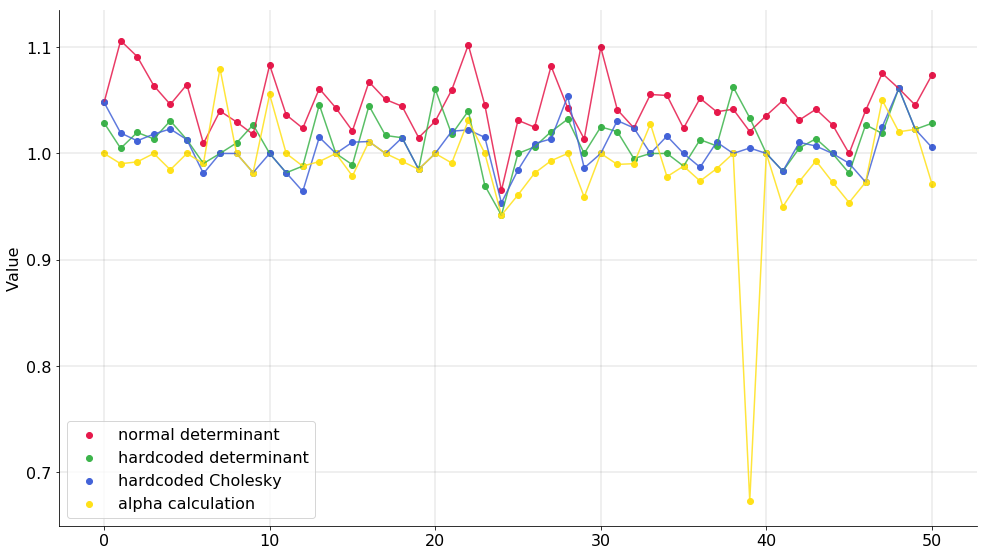

In [10]:
det_filenames = ["no", "det", "hdet", "hchol", "alpha"]
det_names     = ["normal determinant",
                 "hardcoded determinant",
                 "hardcoded Cholesky",
                 "alpha calculation"]
det_arrs = []
det_arrs_r400_450 = []

for f in det_filenames:
    det_arrs.append(read_file(MASTERDIR + DETCALCDIR + f))

for i in range(1, len(det_arrs)):
    for j in range(len(det_arrs[0])):
        det_arrs[i][j] /= det_arrs[0][j]

for i in range(1,len(det_arrs)):
    det_arrs_r400_450.append([])
    for j in range(len(det_arrs[i])):
        if (j >= 400 and j <= 450):
            det_arrs_r400_450[i-1].append(det_arrs[i][j])

scatter_plot("linear", det_arrs_r400_450, det_names)

# Condition Number Averages:

In [11]:
condnumber_normal_arr   = read_file(MASTERDIR + CONDDIR + "normal")
condnumber_singular_arr = read_file(MASTERDIR + CONDDIR + "singular")

condnumber_normal   = sum(condnumber_normal_arr)/len(condnumber_normal_arr)
condnumber_singular = sum(condnumber_singular_arr)/len(condnumber_singular_arr)

print("condition number avg on 'normal' matrices: ", condnumber_normal, "(", math.log10(condnumber_normal), ")")
print("condition number avg on 'special' matrices:", condnumber_singular, "(", math.log10(condnumber_singular), ")")

condition number avg on 'normal' matrices:  890460.5809585346 ( 5.949614698812055 )
condition number avg on 'special' matrices: 1.325237107267658e+46 ( 46.122293587831685 )


# Matrix Determinants Before Exploding:

/home/twig/anaconda3/envs/RK4/lib/python3.7/site-packages/matplotlib/ticker.py:2210: RuntimeWarning: overflow encountered in power
  ticklocs = b ** decades
/home/twig/anaconda3/envs/RK4/lib/python3.7/site-packages/matplotlib/ticker.py:1095: RuntimeWarning: invalid value encountered in double_scalars
  coeff = np.round(x / b ** exponent)


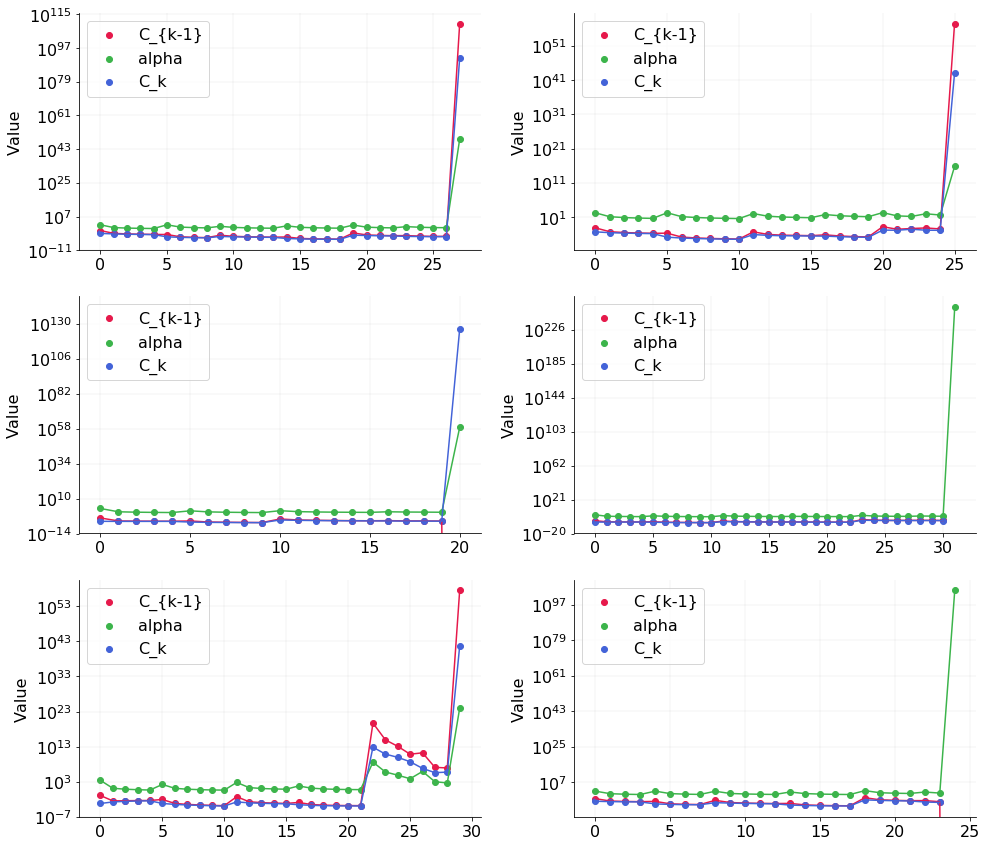

In [12]:
chi2_events = ["e050", "e444", "e473", "e498", "e923", "e936"]
chi2_names  = ["C_{k-1}", "alpha", "C_k"]
c2len = len(chi2_events)

chi2_arr = []
for e in chi2_events:
    chi2_arr.append(read_chi2_file(MASTERDIR + CHI2DIR + e))

index = []
for arr in chi2_arr:
    index.append(np.arange(len(arr[0])))

f, axes = plt.subplots(nrows=int(c2len/2), ncols=2)
f.set_size_inches((14,int(2*c2len)))

acc95 = accessibility_95
for i in range(0, c2len, 2):
    for j in range(len(chi2_arr[i])):
        axes[int(i/2), 0].scatter(index[i],   chi2_arr[i][j],   color=acc95[j], label=chi2_names[j])
        axes[int(i/2), 0].plot(   index[i],   chi2_arr[i][j],   color=acc95[j])
    for j in range(len(chi2_arr[i+1])):
        axes[int(i/2), 1].scatter(index[i+1], chi2_arr[i+1][j], color=acc95[j], label=chi2_names[j])
        axes[int(i/2), 1].plot(   index[i+1], chi2_arr[i+1][j], color=acc95[j])

for i in range(len(axes)):
    for j in range(len(axes[i])):
        axes[i,j].spines['top'].set_visible(False)
        axes[i,j].spines['right'].set_visible(False)
        axes[i,j].grid(color=c_gray[0], linestyle='-', linewidth=0.25, alpha=0.5)
        axes[i,j].set_yscale("log")
        axes[i,j].set_ylabel("Value")
        axes[i,j].legend()

plt.tight_layout()

plt.show()

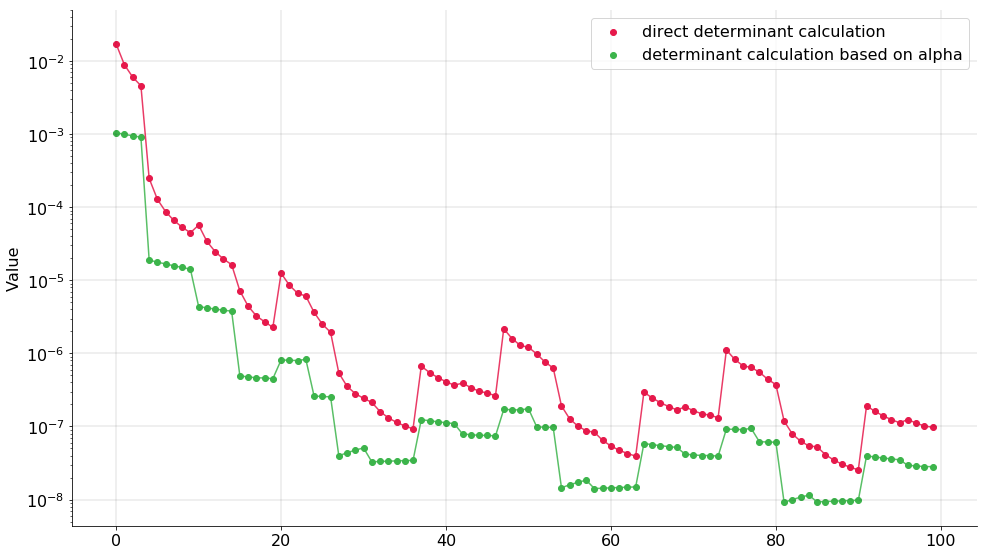

In [14]:
dets = []
filenames = ["det_real", "det_alpha"]
names = ["direct determinant calculation", "determinant calculation based on alpha"]

for filename in filenames:
    dets.append(read_file(MASTERDIR + AVRDETSDIR + filename))

scatter_plot("log", dets, names)